# Simulation Modeling of a Harbor

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("mm.mplstyle")

## Uniform Dsitribution

In [2]:
n_ships = 100

In [3]:
arrival_intervals = np.random.rand(n_ships) * 130 + 15
unloading_times = np.random.rand(n_ships) * 45 + 45

In [4]:
arrival_intervals[:10]

array([ 95.56914529, 133.48365486,  43.55607666, 136.09608542,
       120.75438128,  87.70669825, 112.30772007,  47.33940188,
        59.2592687 ,  84.59137009])

In [5]:
unloading_times[:10]

array([59.33004827, 80.49015788, 68.36976521, 68.27306908, 79.11980671,
       71.97194468, 85.94197541, 73.78602343, 46.11999994, 45.27930905])

Use a heap to manage the events so that the time is ordered. Check out the [heapq module documentation](https://docs.python.org/3/library/heapq.html).

Use a `(time, event_type, ship_id)` tuple to represent events

Use `heapq.heappop` to pop the next element and use `heappush` to push a new element.

In [6]:
import heapq
arrival_times = np.cumsum(arrival_intervals)
events = [(t, "arrival", i) for i, t in enumerate(arrival_times)]
heapq.heapify(events)

Use `deque` to model the waiting queue. Each element in the queue is a tuple of `(ship_id, arrival_time)`.

Use `.append` and `.popleft` to add or remove an item in the queue.

In [7]:
from collections import deque 
queue = deque()
# maximum queue length
max_length = 0
# staying and waiting times
staying_times = [None] * n_ships
waiting_times = [None] * n_ships
# harbor status
harbor_idle = True
# when the harbor becomes idle
last_idle_time = 0
# the total idle time
total_idle_time = 0

while events:
    t, event_type, ship_id = heapq.heappop(events)
    if event_type == "arrival":
        if harbor_idle:
            finish_time = t + unloading_times[ship_id]
            heapq.heappush(events, (finish_time, "finish", ship_id))
            total_idle_time += t - last_idle_time
            harbor_idle = False
            waiting_times[ship_id] = 0
            staying_times[ship_id] = unloading_times[ship_id]
        else:
            queue.append((ship_id, t))
            max_length = max(max_length, len(queue))
    elif event_type == "finish":
        if len(queue) == 0:
            harbor_idle = True
            last_idle_time = t
        else:
            ship_id, arrival_time = queue.popleft()
            finish_time = t + unloading_times[ship_id]
            heapq.heappush(events, (finish_time, "finish", ship_id))
            waiting_times[ship_id] = t - arrival_time
            staying_times[ship_id] = t - arrival_time + unloading_times[ship_id]
    else:
        assert False

In [8]:
print("Avg time staying:", round(np.mean(staying_times)))
print("Max time staying:", round(np.max(staying_times)))
print("Avg time waiting:", round(np.mean(waiting_times)))
print("Max time waiting:", round(np.max(waiting_times)))
idle_percent =  total_idle_time / (arrival_times[-1] + unloading_times[-1]) * 100
print(f"Idle percentage: {idle_percent:.2g}%")
print(f"Max queue length: {max_length}")

Avg time staying: 101
Max time staying: 287
Avg time waiting: 34
Max time waiting: 203
Idle percentage: 18%
Max queue length: 4


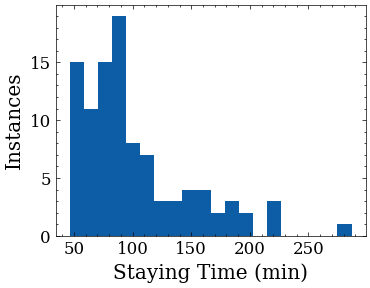

In [9]:
plt.hist(staying_times, bins=20)
plt.xlabel("Staying Time (min)")
plt.ylabel("Instances")
plt.show()

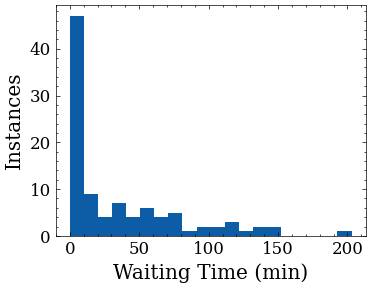

In [10]:
plt.hist(waiting_times, bins=20)
plt.xlabel("Waiting Time (min)")
plt.ylabel("Instances")
plt.show()

Note that the first bin of waiting time is unusually high because of the samples with zero intervals are counted together with samples with small interverals.

Problems
- How would increasing the number of ships affect the result?
- How would decreasing the average unloading time affect the result?

## Other distributions

In [11]:
# delta distribution
arrival_intervals = 0.5 * np.ones(n_ships) * 130 + 15
unloading_times = 0.5 * np.ones(n_ships) * 45 + 45

In [12]:
# geometric distribution
arrival_intervals = np.random.geometric(1/80, n_ships)
unloading_times = np.random.geometric(1/70, n_ships)

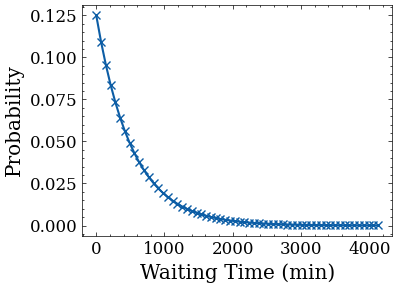

In [13]:
n = np.arange(60)
rho = 70 / 80
plt.plot(70 * n, (1 - rho) * rho ** n, marker="x")
plt.xlabel("Waiting Time (min)")
plt.ylabel("Probability")
plt.show()

Problem
- Why is waiting time distribution so different across the three models with the same average rate